In [169]:
import requests
import requests_cache
import lxml.html as lx
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [87]:
requests_cache.install_cache("medium")

In [151]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

browser = webdriver.Chrome('/Users/melissaknoch/Desktop/chromedriver')

browser.get("https://medium.com/search?q=data%20science")
time.sleep(1)

elem = browser.find_element_by_tag_name("body")

no_of_pagedowns = 100

while no_of_pagedowns:
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)
    no_of_pagedowns-=1
    
links = []

elems = browser.find_elements_by_xpath('//div[contains(@class, "postArticle-readMore")]/a')
for elem in elems:
    links.append(elem.get_attribute("href"))

In [152]:
links

['https://towardsdatascience.com/how-to-learn-data-science-if-youre-broke-7ecc408b53c7?source=search_post---------0',
 'https://medium.freecodecamp.org/if-you-want-to-learn-data-science-start-with-one-of-these-programming-classes-fb694ffe780c?source=search_post---------1',
 'https://medium.freecodecamp.org/i-ranked-all-the-best-data-science-intro-courses-based-on-thousands-of-data-points-db5dc7e3eb8e?source=search_post---------2',
 'https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b?source=search_post---------3',
 'https://towardsdatascience.com/how-to-build-a-data-science-portfolio-5f566517c79c?source=search_post---------4',
 'https://medium.freecodecamp.org/the-best-data-science-courses-on-the-internet-ranked-by-your-reviews-6dc5b910ea40?source=search_post---------5',
 'https://towardsdatascience.com/python-for-data-science-8-concepts-you-may-have-forgotten-i-did-825966908393?source=search_post---------6',
 'https://medium.com/@davidvent

In [153]:
def scrapeMediumArticle(url):
    
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    
    post = {}
    
    post['url'] = url
    
    title = html.xpath("//div[contains(@class, 'postArticle-content')]//h1|//h1")[0].text_content()
    post['title'] = title
    
    tags = html.xpath("//div[contains(@class, 'postArticle-content')]/section//p")
    texts = [tag.text_content() for tag in tags]
    post['text'] = ' '.join(texts)
    
    return post

In [154]:
posts = [scrapeMediumArticle(link) for link in links]

In [155]:
df = pd.DataFrame(posts)
df

,text,title,url
0,"Over the last year, I taught myself data scien...",How To Learn Data Science If You’re Broke,https://towardsdatascience.com/how-to-learn-da...
1,"A year ago, I was a numbers geek with no codin...","If you want to learn Data Science, start with ...",https://medium.freecodecamp.org/if-you-want-to...
2,"A year ago, I dropped out of one of the best c...",I ranked every Intro to Data Science course on...,https://medium.freecodecamp.org/i-ranked-all-t...
3,Ah the dreaded machine learning interview. You...,Data Science and Machine Learning Interview Qu...,https://towardsdatascience.com/data-science-an...
4,How do you get a job in data science? Knowing ...,How to Build a Data Science Portfolio,https://towardsdatascience.com/how-to-build-a-...
5,"A year and a half ago, I dropped out of one of...","The best Data Science courses on the internet,...",https://medium.freecodecamp.org/the-best-data-...
6,If you’ve ever found yourself looking up the s...,Python for Data Science: 8 Concepts You May Ha...,https://towardsdatascience.com/python-for-data...
7,I dropped out of a top computer science progra...,I Dropped Out of School to Create My Own Data ...,https://medium.com/@davidventuri/i-dropped-out...
8,Mathematics is the bedrock of any contemporary...,Essential Math for Data Science,https://medium.com/s/story/essential-math-for-...
9,Mario Kart was a staple of my childhood — my f...,The best Mario Kart character according to dat...,https://medium.com/civis-analytics/the-best-ma...


In [164]:
stops = stopwords.words("english")
lemmatizer = nltk.WordNetLemmatizer()

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

def standardize_doc(doc):
    """
    Standardize a doc by lowercasing, removing stopwords & punctuation, and lemmatizing.
    Input: a single doc string
    Output: standardized tokens
    """
    words = [w.lower() for w in nltk.word_tokenize(doc)]
    words = [w for w in words if w not in stops and w.isalpha()]
    words_tags = nltk.pos_tag(words)
    words = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w,t) in words_tags]                              
    return words 


In [207]:
standardized = [standardize_doc(doc) for doc in df['text']]
df['standardized'] = standardized
joined = [' '.join(doc) for doc in standardized]
all_articles = ' '.join(joined)
all_articles

'last year teach data science learn hundred online resource study hour every day work minimum wage goal start career passionate despite lack fund choice accomplish lot last month publish website posted major online data science publication give scholarship competitive computer science graduate program follow article give guideline advice make data science curriculum hope give others tool begin educational journey begin work towards passionate career data science say data science refer collection tool turn data action include machine learn database technology statistic program technology internet chaotic mess learn often feel like drinking fun end simpler alternative offer sort mess site like dataquest datacamp udacity offer teach data science skill create education program shepherd topic topic require little part problem cost much teach apply concept job set prevent explore interest passion free alternative like edx coursera offer course dive specific topic learn well videos classroom 

In [210]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stops,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

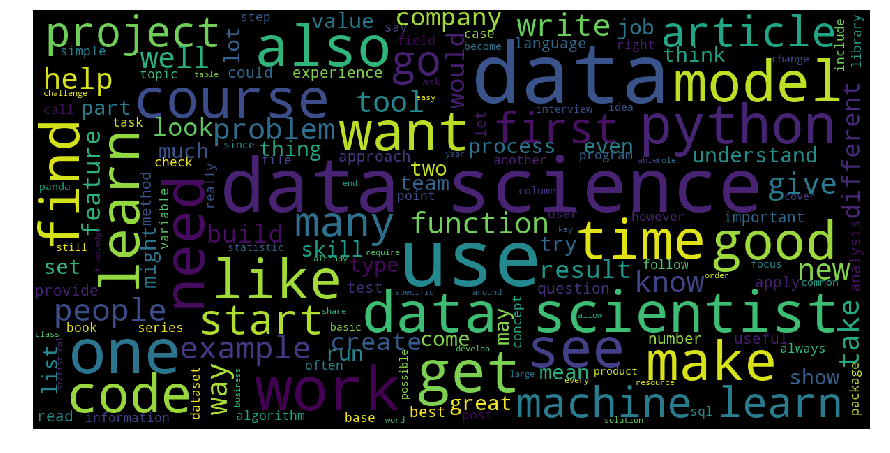

In [211]:
show_wordcloud(all_articles)